<a href="https://colab.research.google.com/github/som-pat/CSNN-Image-Recognition/blob/main/SNN3_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install snntorch --quiet
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen
from snntorch import surrogate

import torch
import torch.nn as nn
from torch.utils.data import DataLoader,random_split
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
import itertools
from snntorch import functional as SF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
batch_size = 64
data_path='/data/Dataloader'

dtype = torch.float
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

## CIFAR10

In [ ]:
def DogFilter(img):
  img = img - transforms.functional.gaussian_blur(img,kernel_size=3,sigma=0.5 )
  return img

In [ ]:
# transform_train = transforms.Compose([
#             transforms.RandomCrop(32, padding=4),
# 			      transforms.RandomHorizontalFlip(),
# 			      transforms.ToTensor(),
# 			      transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.557, 0.549, 0.5534]),
#             ])

# transform_test = transforms.Compose([ transforms.ToTensor(),
# 			                                transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.557, 0.549, 0.5534]),
#                                       ])

transform = transforms.Compose([
            transforms.Resize((32, 32)),
						# transforms.GaussianBlur(kernel_size = (5,7),sigma = (0.2,3)),
            transforms.RandomAutocontrast(),
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0,), (1,)),
            DogFilter
            ])

train = datasets.CIFAR10(data_path, train=True, download=True, transform=transform)
test = datasets.CIFAR10(data_path, train=False, download=True, transform=transform)

100%|██████████| 170498071/170498071 [00:05<00:00, 28995972.56it/s]


Extracting /data/Dataloader/cifar-10-python.tar.gz to /data/Dataloader
Files already downloaded and verified


In [ ]:
len(train)

50000

In [ ]:
train, valid = random_split(train,[40000,10000])

In [ ]:
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=True)
valid_loader = DataLoader(valid, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=True, drop_last=True)

In [ ]:
n_i = 32
num_hidden = 1024
num_out = 100
num_outputs=10
fc1 = 8192
# Temporal Dynamics
num_steps =25
beta = 0.9

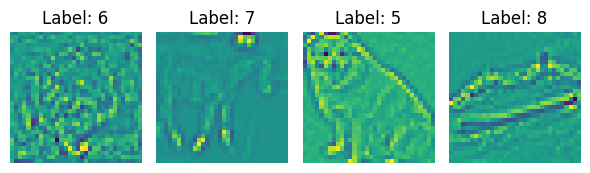

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(6, 6))  # Create a horizontal line of subplots

for i in range(4):
    image, label = train[i]
    axs[i].imshow(image.permute(1, 2, 0))   # Display the grayscale image
    axs[i].set_title(f"Label: {label}")
    axs[i].axis('off')  # Turn off axis labels and ticks

plt.tight_layout()
plt.show()

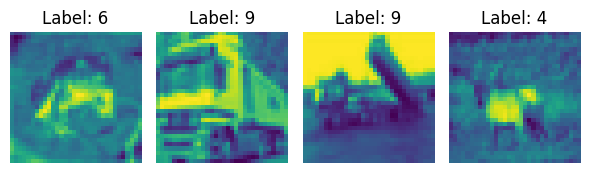

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(6, 6))  # Create a horizontal line of subplots

for i in range(4):
    image, label = train[i]
    axs[i].imshow(image.permute(1, 2, 0))   # Display the grayscale image
    axs[i].set_title(f"Label: {label}")
    axs[i].axis('off')  # Turn off axis labels and ticks

plt.tight_layout()
plt.show()

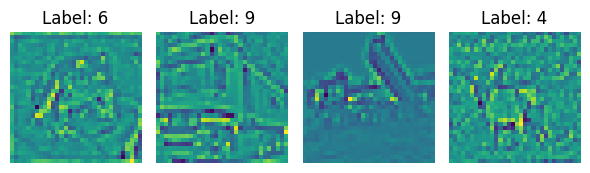

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(6, 6))  # Create a horizontal line of subplots

for i in range(4):
    image, label = train[i]
    axs[i].imshow(image.permute(1, 2, 0))   # Display the grayscale image
    axs[i].set_title(f"Label: {label}")
    axs[i].axis('off')  # Turn off axis labels and ticks

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Gain = 2.0')

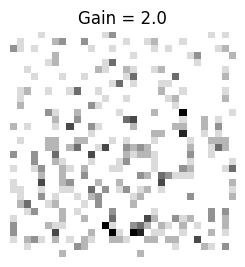

In [ ]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML
image, label = train[0]
images1 = spikegen.rate(image[0], num_steps,gain = 2.0)
spike_data_sample = images1
plt.figure(facecolor="w")
plt.subplot(1,2,1)
plt.imshow(spike_data_sample.mean(axis=0).reshape((32,-1)).cpu(), cmap='binary')
plt.axis('off')
plt.title('Gain = 2.0')

Text(0.5, 1.0, 'Gain = 2.0')

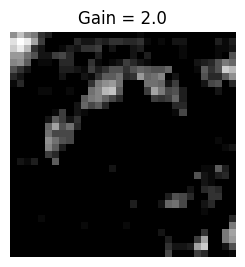

In [ ]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML
image, label = train[0]
images1 = spikegen.rate(image[0], num_steps,gain = 2.0)
spike_data_sample = images1
plt.figure(facecolor="w")
plt.subplot(1,2,1)
plt.imshow(spike_data_sample.mean(axis=0).reshape((32,-1)).cpu(), cmap='binary')
plt.axis('off')
plt.title('Gain = 2.0')

Text(0.5, 1.0, 'Gain = 2.0')

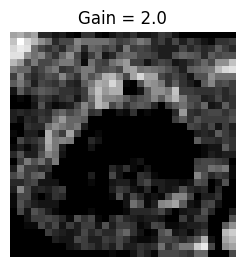

In [ ]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML
image, label = train[0]
images1 = spikegen.rate(image[0], num_steps,gain = 2.0)
spike_data_sample = images1
plt.figure(facecolor="w")
plt.subplot(1,2,1)
plt.imshow(spike_data_sample.mean(axis=0).reshape((32,-1)).cpu(), cmap='binary')
plt.axis('off')
plt.title('Gain = 2.0')

Text(0.5, 1.0, 'Gain = 2.0')

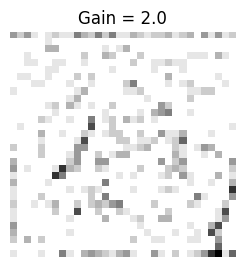

In [ ]:
import matplotlib.pyplot as plt
import snntorch.spikeplot as splt
from IPython.display import HTML
image, label = train[0]
images1 = spikegen.rate(image[0], num_steps,gain = 3.5)
spike_data_sample = images1
plt.figure(facecolor="w")
plt.subplot(1,2,1)
plt.imshow(spike_data_sample.mean(axis=0).reshape((32,-1)).cpu(), cmap='binary')
plt.axis('off')
plt.title('Gain = 2.0')

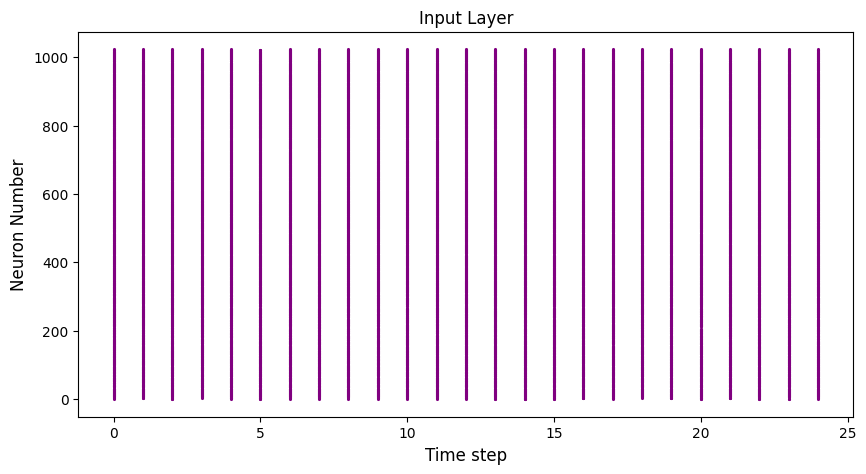

In [ ]:
spike_data = spike_data_sample.reshape(num_steps, -1)

# raster plot
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data, ax, s=1.5, c="purple")
  # Turn off the axis
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)
plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

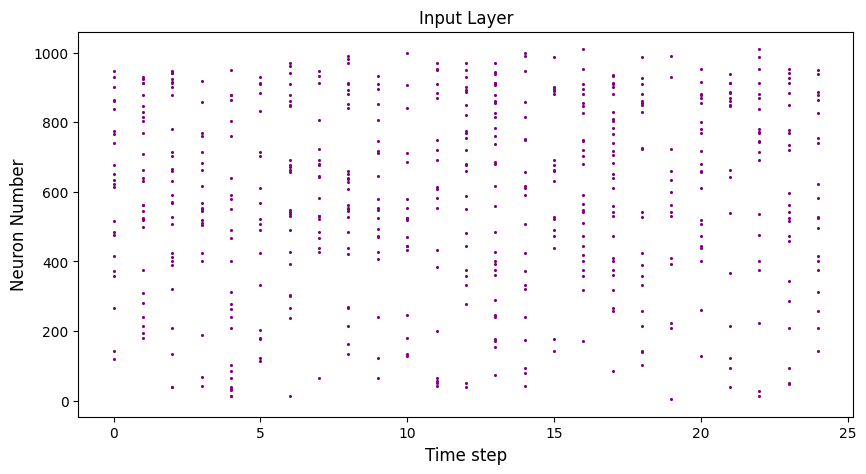

In [ ]:
spike_data = spike_data_sample.reshape(num_steps, -1)

# raster plot
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data, ax, s=1.5, c="purple")
  # Turn off the axis
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)
plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

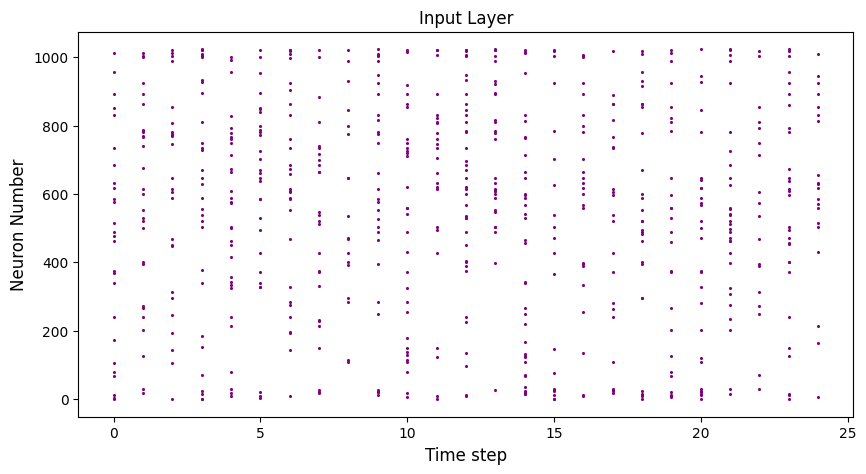

In [ ]:
spike_data = spike_data_sample.reshape(num_steps, -1)

# raster plot
fig = plt.figure(facecolor="w", figsize=(10, 5))
ax = fig.add_subplot(111)
splt.raster(spike_data, ax, s=1.5, c="purple")
  # Turn off the axis
ax.xaxis.label.set_fontsize(12)
ax.yaxis.label.set_fontsize(12)
plt.title("Input Layer")
plt.xlabel("Time step")
plt.ylabel("Neuron Number")
plt.show()

## GTSRB

In [ ]:
transform = transforms.Compose([
            transforms.Resize((64, 64)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            transforms.Normalize((0,), (1,))])

train = datasets.GTSRB(data_path, split='train', download=True, transform=transform)
test = datasets.GTSRB(data_path, split= 'test', download=True, transform=transform)

In [ ]:
len(train)

In [ ]:
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=True, drop_last=True)

In [ ]:
num_inputs = 64*64
num_hidden = 1024
# num_out = 100
num_outputs=43
in_inputs = 32768
# Temporal Dynamics
num_steps = 100
beta = 0.8

## Model

## Convnet

In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        spike_grad = surrogate.atan()

        # Initialize layers
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.lif1 = snn.Leaky(beta=beta,learn_threshold=True,spike_grad=spike_grad)
        self.mp1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.lif2 = snn.Leaky(beta=beta,spike_grad=spike_grad)
        self.mp2 = nn.MaxPool2d(2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.olif1 = snn.Leaky(beta=beta,spike_grad=spike_grad)
        self.mp3 = nn.MaxPool2d(2)
        #mnist,FashionMnist:6272,1152
        #cifar10 = 2048
        #gtsrb; 8192
        self.fc1 = nn.Linear(2048,num_hidden)
        self.lif3 = snn.Leaky(beta=beta,learn_beta=True,spike_grad=spike_grad)
        self.dpc1 = nn.Dropout(0.2)

        self.fc2 = nn.Linear(num_hidden,512)
        self.lif4 = snn.Leaky(beta =beta,learn_beta=True,spike_grad=spike_grad)

        self.fc3 = nn.Linear(512,10)
        self.lif5 = snn.Leaky(beta=beta,learn_beta=True,spike_grad=spike_grad)

        # self.fc4 = nn.Linear(256,num_outputs)
        # self.lif6 = snn.Leaky(beta=beta,learn_beta=True,spike_grad=spike_grad)

    def forward(self, x):

        # Initialize hidden states at t=0
        mem1 = self.lif1.init_leaky()
        mem2 = self.lif2.init_leaky()
        mem3 = self.lif3.init_leaky()
        mem4 = self.lif4.init_leaky()
        mem5 = self.lif5.init_leaky()
        # mem6 = self.lif6.init_leaky()
        omem1 = self.olif1.init_leaky()


        # Record the final layer
        spk3_rec = []
        mem3_rec = []

        # time-loop
        for step in range(num_steps):
            cur1 = self.conv1(x)
            cur1 = self.bn1(cur1)
            spk1, mem1 = self.lif1(self.mp1(cur1), mem1)
            cur2 = self.conv2(spk1)
            cur2 = self.bn2(cur2)
            spk2, mem2 = self.lif2(self.mp2(cur2), mem2)
            ocur1 = self.conv3(spk2)
            ocur1 = self.bn3(ocur1)
            ospk1, omem1 = self.olif1(self.mp3(ocur1),omem1)
            cur3 = self.fc1(ospk1.flatten(1))
            cur3 = self.dpc1(cur3)
            spk3, mem3 = self.lif3(cur3, mem3)
            cur4 = self.fc2(spk3)
            spk4, mem4 = self.lif4(cur4, mem4)
            cur5 = self.fc3(spk4)
            spk5, mem5 = self.lif5(cur5, mem5)
            # cur6 = self.fc4(spk5)
            # spk6, mem6 = self.lif6(cur6, mem6)

            spk3_rec.append(spk5)
            mem3_rec.append(mem5)

        return torch.stack(spk3_rec, dim=0), torch.stack(mem3_rec, dim=0)

# Load the network onto CUDA if available
convnet = ConvNet().to(device)

In [ ]:
# class ConvNet(nn.Module):
#     def __init__(self):
#         super().__init__()
#         spike_grad = surrogate.atan()

#         # Initialize layers
#         self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
#         self.bn1 = nn.BatchNorm2d(16)
#         self.lif1 = snn.Leaky(beta=beta,learn_threshold=True,spike_grad=spike_grad,learn_beta=True)
#         self.mp1 = nn.MaxPool2d(2)

#         self.conv2 = nn.Conv2d(16, 64, kernel_size=3, stride=1, padding=1)
#         self.bn2 = nn.BatchNorm2d(64)
#         self.lif2 = snn.Leaky(beta=beta,spike_grad=spike_grad,learn_beta=True)
#         self.mp2 = nn.MaxPool2d(2)

#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
#         self.bn3 = nn.BatchNorm2d(128)
#         self.olif1 = snn.Leaky(beta=beta,spike_grad=spike_grad,learn_beta=True)
#         self.mp3 = nn.MaxPool2d(2)
#         #mnist,FashionMnist:6272,1152
#         #cifar10 = 2048
#         self.fc1 = nn.Linear(2048,8192)
#         self.lif3 = snn.Leaky(beta=beta,learn_beta=True,spike_grad=spike_grad)

#         self.fc2 = nn.Linear(8192,4096)
#         self.lif4 = snn.Leaky(beta =beta,learn_beta=True,spike_grad=spike_grad)

#         self.fc3 = nn.Linear(4096,512)
#         self.lif5 = snn.Leaky(beta=beta,learn_beta=True,spike_grad=spike_grad)

#         self.fc4 = nn.Linear(512,256)
#         self.lif6 = snn.Leaky(beta=beta,learn_beta=True,spike_grad=spike_grad)

#         self.fc5 = nn.Linear(256,num_outputs)
#         self.lif7 = snn.Leaky(beta=beta,learn_beta=True,spike_grad=spike_grad)

#     def forward(self, x):

#         # Initialize hidden states at t=0
#         mem1 = self.lif1.init_leaky()
#         mem2 = self.lif2.init_leaky()
#         mem3 = self.lif3.init_leaky()
#         mem4 = self.lif4.init_leaky()
#         mem5 = self.lif5.init_leaky()
#         mem6 = self.lif6.init_leaky()
#         mem7 = self.lif7.init_leaky()
#         omem1 = self.olif1.init_leaky()


#         # Record the final layer
#         spk3_rec = []
#         mem3_rec = []

#         # time-loop
#         for step in range(num_steps):
#             cur1 = self.conv1(x)
#             cur1 = self.bn1(cur1)
#             spk1, mem1 = self.lif1(self.mp1(cur1), mem1)
#             cur2 = self.conv2(spk1)
#             cur2 = self.bn2(cur2)
#             spk2, mem2 = self.lif2(self.mp2(cur2), mem2)
#             ocur1 = self.conv3(spk2)
#             ocur1 = self.bn3(ocur1)
#             ospk1, omem1 = self.olif1(self.mp3(ocur1),omem1)
#             cur3 = self.fc1(ospk1.flatten(1))
#             spk3, mem3 = self.lif3(cur3, mem3)
#             cur4 = self.fc2(spk3)
#             spk4, mem4 = self.lif4(cur4, mem4)
#             cur5 = self.fc3(spk4)
#             spk5, mem5 = self.lif5(cur5, mem5)
#             cur6 = self.fc4(spk5)
#             spk6, mem6 = self.lif6(cur6, mem6)
#             cur7 = self.fc5(spk6)
#             spk7, mem7 = self.lif7(cur7, mem7)

#             spk3_rec.append(spk7)
#             mem3_rec.append(mem7)

#         return torch.stack(spk3_rec, dim=0), torch.stack(mem3_rec, dim=0)

# # Load the network onto CUDA if available
# convnet = ConvNet().to(device)

In [ ]:
train_acc= []
test_acc =[]
def calc_accuracy(spk_rec,targets,Train):
    _, idx = spk_rec.sum(dim=0).max(1)
    acc = np.mean((targets == idx).detach().cpu().numpy())

    if Train==True:
        train_acc.append(acc*100)
        return acc*100
    elif Train ==False :
        test_acc.append(acc*100)
        return acc*100

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(convnet.parameters(), lr=5e-5, betas=(0.9, 0.999))

num_epochs = 12
loss_hist = []
valid_loss_hist = []
counter = 0
prune_percentage = 0.3


# Outer training loop
for epoch in range(num_epochs):
    train_batch = iter(train_loader)

    # Minibatch training loop
    for data, targets in train_batch:
        data = data.to(device)
        targets = targets.to(device)
        # data = spikegen.rate_conv(data)
        # forward pass
        convnet.train()
        # data = spikegen.rate(data, num_steps=num_steps,gain=3.5)
        spk_rec, mem_rec = convnet(data)

        # initialize the loss & sum over time
        loss_val = torch.zeros((1), dtype=dtype, device=device)
        loss_val = loss(spk_rec.sum(0), targets)

        # Gradient calculation + weight update
        optimizer.zero_grad()
        loss_val.backward()
        for module in convnet.modules():

              if isinstance(module, nn.Conv2d):
                weights = module.weight.data
                threshold = torch.kthvalue(torch.abs(weights).view(-1), int(prune_percentage * weights.numel()))[0]
                pruned_weights = torch.where(torch.abs(weights) < threshold, torch.tensor(0), weights)
                module.weight.data = pruned_weights

        optimizer.step()

        # Store loss history for future plotting
        loss_hist.append(loss_val.item())

        with torch.no_grad():
            convnet.eval()
            valid_data, valid_targets = next(iter(test_loader))
            valid_data = valid_data.to(device)
            valid_targets = valid_targets.to(device)

            # Test set forward pass
            # valid_data = spikegen.rate_conv(valid_data)
            # valid_data = spikegen.rate(valid_data, num_steps=num_steps,gain=3.5)
            valid_spk, valid_mem = convnet(valid_data)

            # Test set loss
            test_loss = torch.zeros((1), dtype=dtype, device=device)
            valid_loss_val = loss(valid_spk.sum(0), valid_targets)
            valid_loss_hist.append(valid_loss_val.item())

        # Print train/test loss/accuracy
        if counter % 10 == 0:
            print(f"Iteration: {counter}, Train Loss: {loss_val.item()} \t Validation Loss: {valid_loss_val.item()}")
            print(f"\t\t Training Accuracy:{calc_accuracy(spk_rec,targets,Train=True)} \t Validation Accuracy: {calc_accuracy(valid_spk,valid_targets,Train=False)}  ")
        counter += 1

Iteration: 0, Train Loss: 2.406888961791992 	 Validation Loss: 2.3025848865509033
		 Training Accuracy:4.6875 	 Validation Accuracy: 10.9375  
Iteration: 10, Train Loss: 2.2990081310272217 	 Validation Loss: 2.2713208198547363
		 Training Accuracy:6.25 	 Validation Accuracy: 14.0625  
Iteration: 20, Train Loss: 2.3163957595825195 	 Validation Loss: 2.1910905838012695
		 Training Accuracy:17.1875 	 Validation Accuracy: 20.3125  
Iteration: 30, Train Loss: 2.2607085704803467 	 Validation Loss: 2.2210376262664795
		 Training Accuracy:20.3125 	 Validation Accuracy: 23.4375  
Iteration: 40, Train Loss: 2.24565052986145 	 Validation Loss: 2.278049945831299
		 Training Accuracy:25.0 	 Validation Accuracy: 20.3125  
Iteration: 50, Train Loss: 2.3435535430908203 	 Validation Loss: 2.3349740505218506
		 Training Accuracy:12.5 	 Validation Accuracy: 12.5  
Iteration: 60, Train Loss: 2.236621856689453 	 Validation Loss: 2.204362154006958
		 Training Accuracy:20.3125 	 Validation Accuracy: 18.75  


In [ ]:
def measure_accuracy(model, dataloader):
  with torch.no_grad():
    model.eval()
    running_length = 0
    running_accuracy = 0

    for data, targets in iter(dataloader):
      data = data.to(device)
      targets = targets.to(device)

      # forward-pass

      spk_rec, _ = model(data)
      spike_count = spk_rec.sum(0)
      _, max_spike = spike_count.max(1)

      # correct classes for one batch
      num_correct = (max_spike == targets).sum()

      # total accuracy
      running_length += len(targets)
      running_accuracy += num_correct

    accuracy = np.mean((targets == max_spike).detach().cpu().numpy())

    return accuracy.item()

print(f"ConvNet Test Accuracy: {measure_accuracy(convnet, test_loader)}")

ConvNet Test Accuracy: 0.671875


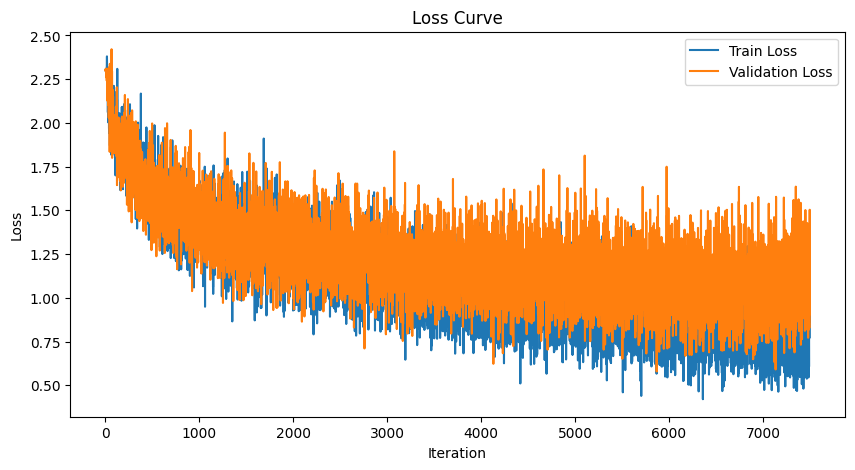

In [ ]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot(loss_hist)
plt.plot(valid_loss_hist)
plt.title("Loss Curve")
plt.legend(["Train Loss", "Validation Loss"])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

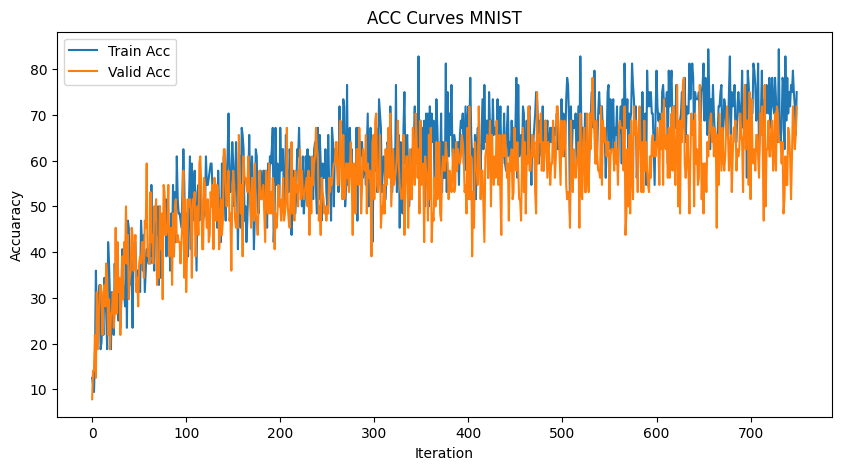

In [ ]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot(train_acc)
plt.plot(test_acc)
plt.title("ACC Curves MNIST")
plt.legend(["Train Acc", "Valid Acc"])
plt.xlabel("Iteration")
plt.ylabel("Accuaracy")
plt.show()

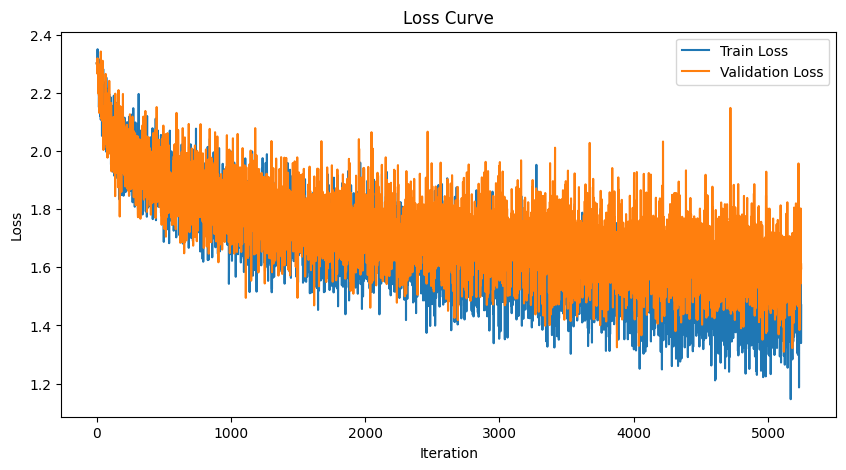

In [ ]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot(loss_hist)
plt.plot(valid_loss_hist)
plt.title("Loss Curve")
plt.legend(["Train Loss", "Validation Loss"])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

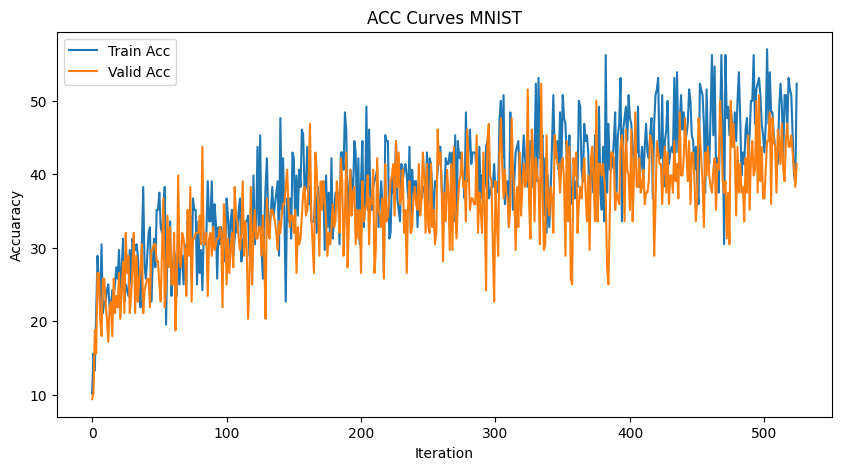

In [ ]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot(train_acc)
plt.plot(test_acc)
plt.title("ACC Curves MNIST")
plt.legend(["Train Acc", "Valid Acc"])
plt.xlabel("Iteration")
plt.ylabel("Accuaracy")
plt.show()

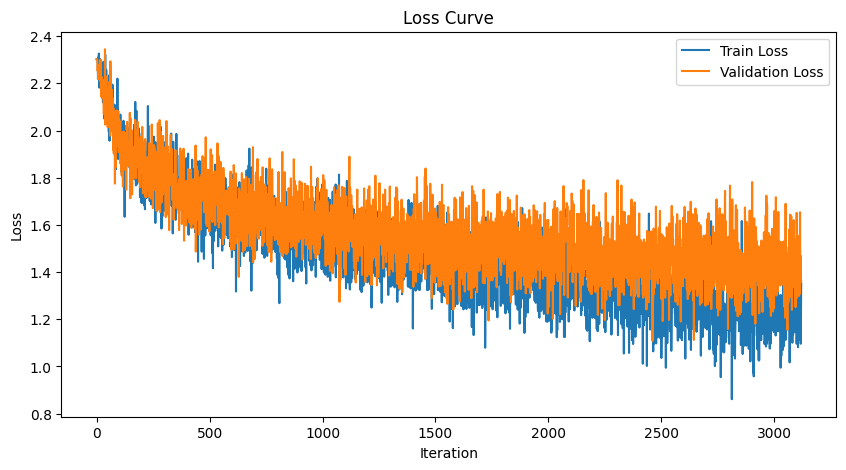

In [ ]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot(loss_hist)
plt.plot(valid_loss_hist)
plt.title("Loss Curve")
plt.legend(["Train Loss", "Validation Loss"])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

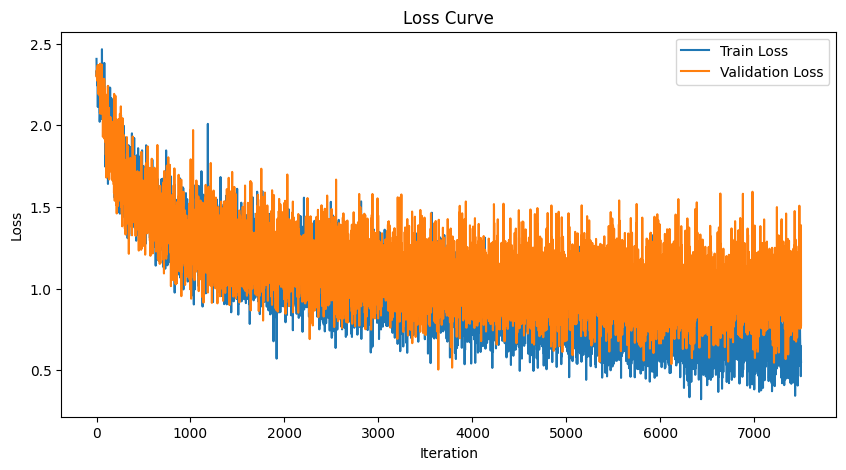

In [ ]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot(loss_hist)
plt.plot(valid_loss_hist)
plt.title("Loss Curve")
plt.legend(["Train Loss", "Validation Loss"])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

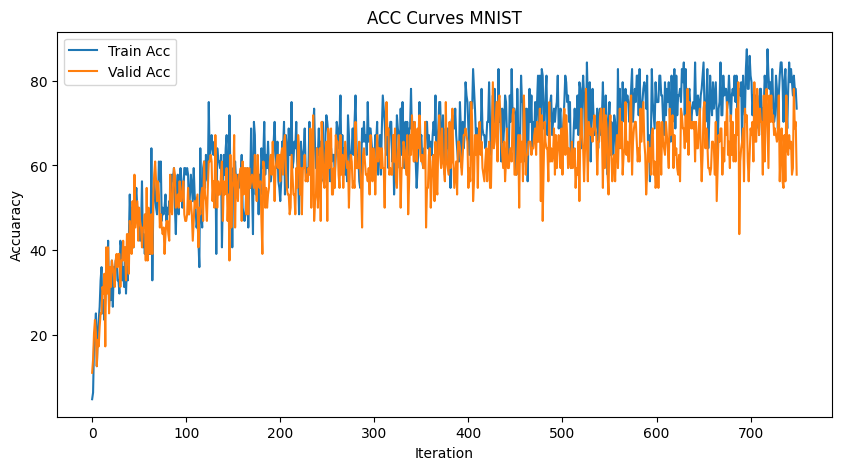

In [ ]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot(train_acc)
plt.plot(test_acc)
plt.title("ACC Curves MNIST")
plt.legend(["Train Acc", "Valid Acc"])
plt.xlabel("Iteration")
plt.ylabel("Accuaracy")
plt.show()

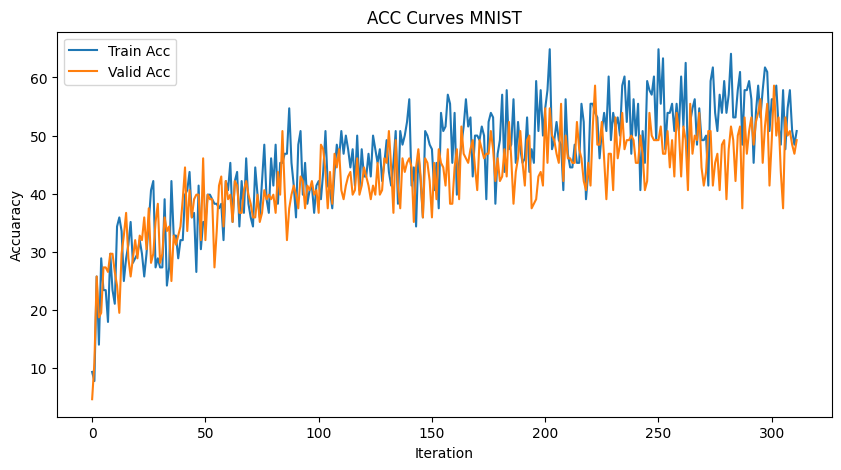

In [ ]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot(train_acc)
plt.plot(test_acc)
plt.title("ACC Curves MNIST")
plt.legend(["Train Acc", "Valid Acc"])
plt.xlabel("Iteration")
plt.ylabel("Accuaracy")
plt.show()

The target label is: 7


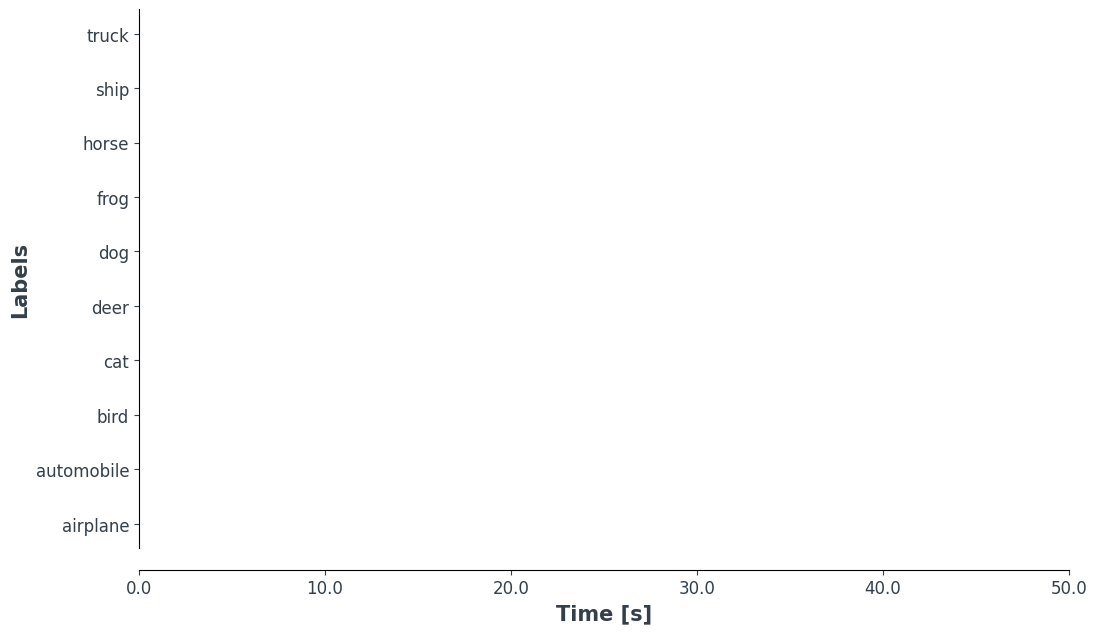

In [ ]:
from IPython.display import HTML

idx = 0

fig, ax = plt.subplots(facecolor='w', figsize=(12, 7))
# labels=['0', '1', '2', '3', '4', '5', '6', '7', '8','9']
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(f"The target label is: {targets[idx]}")

# plt.rcParams['animation.ffmpeg_path'] = 'C:\\path\\to\\your\\ffmpeg.exe'

#  Plot spike count histogram
anim = splt.spike_count(spk_rec[:, idx].detach().cpu(), fig, ax, labels=labels,
                        animate=True, interpolate=1,time_step=1)

HTML(anim.to_html5_video())

The target label is: 6


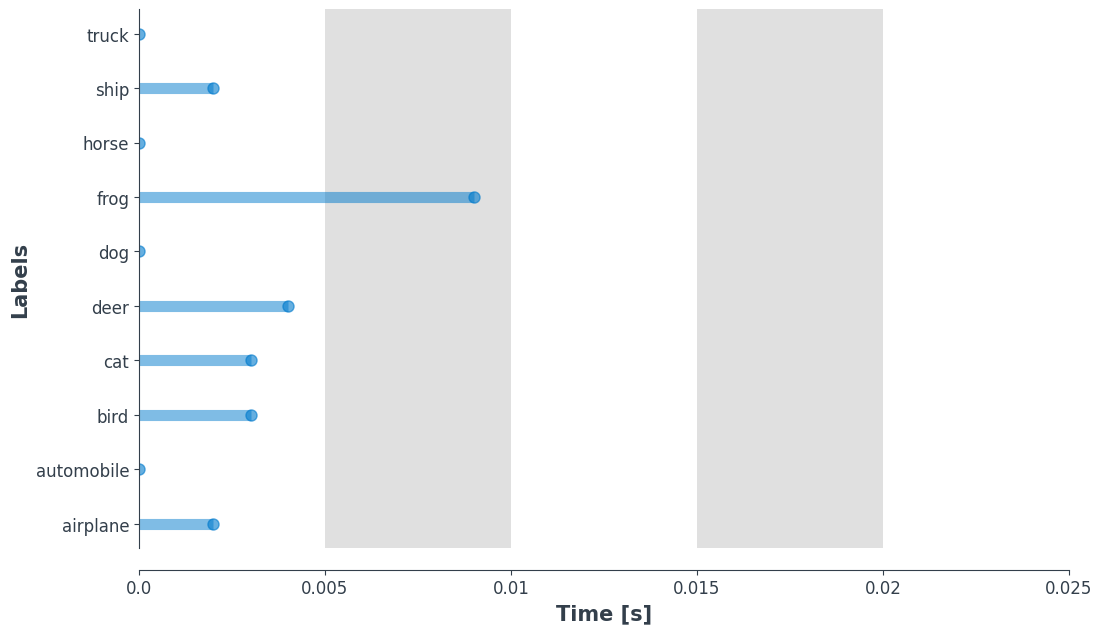

<Figure size 640x480 with 0 Axes>

In [ ]:
#MNIST
import snntorch.spikeplot as splt
import matplotlib.pyplot as plt
from IPython.display import HTML
# print(spk_rec.size())

idx =1
# #  We only need a single data sample
# print(spk_rec1,spk_rec2)
# spk_results = torch.stack((spk_rec1,spk_rec2), dim=0).to('cpu')
# spk_results = spk_rec.squeeze(dim=1).detach().cpu()
# spk_results = spk_results[:,0,:].to('cpu')
#print(spk_results.shape)


fig, ax = plt.subplots(facecolor='w', figsize=(12, 7))
# labels=['0', '1', '2', '3', '4', '5', '6', '7', '8','9']
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(f"The target label is: {targets[idx]}")

#  Plot and save spike count histogram
splt.spike_count(spk_rec[:, idx].detach().cpu(), fig, ax, labels, num_steps = num_steps,time_step=1e-3)
plt.show()
plt.savefig('hist2.png', dpi=300, bbox_inches='tight')

# Animate and save spike count histogram
# anim1 = splt.spike_count(spk_results, fig, ax, labels, animate=True,interpolate=10, num_steps = num_steps, time_step=2e-3)
# anim = splt.spike_count(spk_rec[:, idx].detach().cpu(), fig, ax, labels, animate=True,interpolate=10, num_steps = num_steps, time_step=2e-3)

# HTML(anim.to_html5_video())
# anim.save("spike_bar.gif")

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True)

In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(convnet.parameters(), lr=5e-5, betas=(0.9, 0.999))

num_epochs = 4
loss_hist = []
valid_loss_hist = []
counter = 0
prune_percentage = 0.3

for fold, (t_indices,v_indices) in enumerate(kf.split(train)):
    train_sam = torch.utils.data.SubsetRandomSampler(t_indices)
    val_sam= torch.utils.data.SubsetRandomSampler(v_indices)

    train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=batch_size, sampler=train_sam)
    valid_loader = torch.utils.data.DataLoader(dataset=train, batch_size=batch_size, sampler=val_sam)

# Outer training loop
    for epoch in range(num_epochs):
        train_batch = iter(train_loader)

        # Minibatch training loop
        for data, targets in train_batch:
            data = data.to(device)
            targets = targets.to(device)

            # forward pass
            convnet.train()
            # data = spikegen.rate(data, num_steps=num_steps,gain=2.0)
            spk_rec, mem_rec = convnet(data)

            # initialize the loss & sum over time
            loss_val = torch.zeros((1), dtype=dtype, device=device)
            loss_val = loss(spk_rec.sum(0), targets)
            # loss_val = loss(spk_rec, targets)

            # Gradient calculation + weight update
            optimizer.zero_grad()
            loss_val.backward()
            for module in convnet.modules():
              if isinstance(module, nn.Conv2d):
                weights = module.weight.data
                threshold = torch.kthvalue(torch.abs(weights).view(-1), int(prune_percentage * weights.numel()))[0]
                pruned_weights = torch.where(torch.abs(weights) < threshold, torch.tensor(0), weights)
                module.weight.data = pruned_weights


            optimizer.step()

            # Store loss history for future plotting
            loss_hist.append(loss_val.item())

            with torch.no_grad():
                convnet.eval()
                valid_data, valid_targets = next(iter(valid_loader))
                valid_data = valid_data.to(device)
                valid_targets = valid_targets.to(device)

                # Test set forward pass
                # valid_data = spikegen.rate(valid_data, num_steps=num_steps,gain=2.0)
                valid_spk, valid_mem = convnet(valid_data)

                # # Test set loss
                valid_loss_val = torch.zeros((1), dtype=dtype, device=device)
                valid_loss_val = loss(valid_spk.sum(0), valid_targets)
                # valid_loss_val =loss(valid_spk, valid_targets)
                valid_loss_hist.append(valid_loss_val.item())

            # Print train/test loss/accuracy
            if counter % 10 == 0:
                print(f"Iteration: {counter}, Train Loss: {loss_val.item()} \t Validation Loss: {valid_loss_val.item()}")
                print(f"\t\t Training Accuracy:{calc_accuracy(spk_rec,targets,Train=True)} \t Validation Accuracy: {calc_accuracy(valid_spk,valid_targets,Train=False)}  ")
            counter += 1

Iteration: 0, Train Loss: 2.3025848865509033 	 Validation Loss: 2.3025848865509033
		 Training Accuracy:9.375 	 Validation Accuracy: 14.0625  
Iteration: 10, Train Loss: 2.3025848865509033 	 Validation Loss: 2.3025848865509033
		 Training Accuracy:7.8125 	 Validation Accuracy: 10.9375  
Iteration: 20, Train Loss: 2.321105718612671 	 Validation Loss: 2.2789063453674316
		 Training Accuracy:15.625 	 Validation Accuracy: 17.1875  
Iteration: 30, Train Loss: 2.272855281829834 	 Validation Loss: 2.3689541816711426
		 Training Accuracy:21.875 	 Validation Accuracy: 9.375  
Iteration: 40, Train Loss: 2.2562880516052246 	 Validation Loss: 2.2036445140838623
		 Training Accuracy:25.0 	 Validation Accuracy: 20.3125  
Iteration: 50, Train Loss: 2.0057244300842285 	 Validation Loss: 2.260978937149048
		 Training Accuracy:26.5625 	 Validation Accuracy: 12.5  
Iteration: 60, Train Loss: 2.129124641418457 	 Validation Loss: 2.1448235511779785
		 Training Accuracy:17.1875 	 Validation Accuracy: 29.687

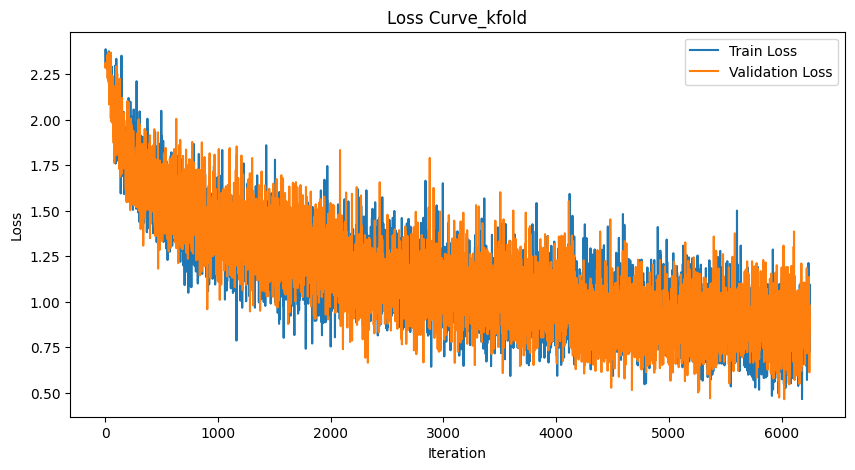

In [ ]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot(loss_hist)
plt.plot(valid_loss_hist)
plt.title("Loss Curve_kfold")
plt.legend(["Train Loss", "Validation Loss"])
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

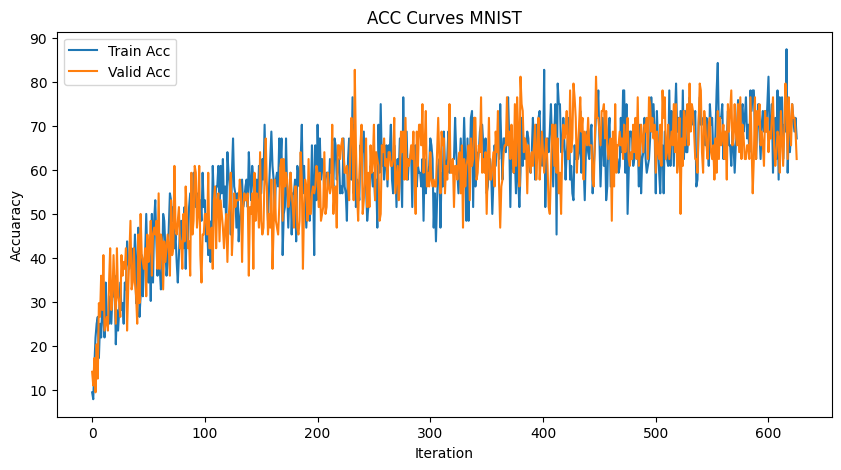

In [ ]:
fig = plt.figure(facecolor="w", figsize=(10, 5))
plt.plot(train_acc)
plt.plot(test_acc)
plt.title("ACC Curves_kfold")
plt.legend(["Train Acc", "Valid Acc"])
plt.xlabel("Iteration")
plt.ylabel("Accuaracy")
plt.show()

The target label is: 9


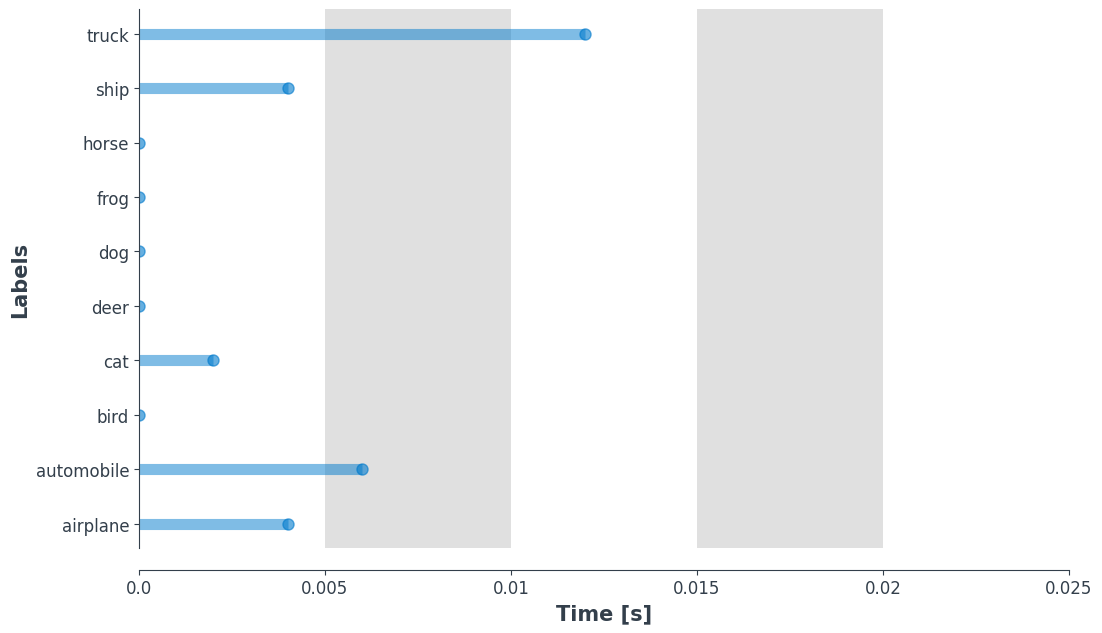

<Figure size 640x480 with 0 Axes>

In [ ]:

import snntorch.spikeplot as splt
import matplotlib.pyplot as plt
from IPython.display import HTML
# print(spk_rec.size())

idx =0

fig, ax = plt.subplots(facecolor='w', figsize=(12, 7))
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(f"The target label is: {targets[idx]}")

#  Plot and save spike count histogram
splt.spike_count(spk_rec[:, idx].detach().cpu(), fig, ax, labels, num_steps = num_steps,time_step=1e-3)
plt.show()
plt.savefig('hist2.png', dpi=300, bbox_inches='tight')


In [ ]:
test_loader = DataLoader(test, batch_size=batch_size, shuffle=True, drop_last=True)
def measure_accuracy(model, dataloader):
  with torch.no_grad():
    model.eval()
    running_length = 0
    running_accuracy = 0

    for data, targets in iter(dataloader):
      data = data.to(device)
      targets = targets.to(device)

      # forward-pass
      # data = spikegen.rate(data, num_steps=num_steps,gain=2.0)
      spk_rec, _ = model(data)
      spike_count = spk_rec.sum(0)
      _, max_spike = spike_count.max(1)

      # correct classes for one batch
      num_correct = (max_spike == targets).sum()

      # total accuracy
      running_length += len(targets)
      running_accuracy += num_correct

    accuracy = np.mean((targets == max_spike).detach().cpu().numpy())

    return accuracy.item()

print(f"ConvNet Test Accuracy: {measure_accuracy(convnet, test_loader)}")

ConvNet Test Accuracy: 0.59375
